In [2]:
%config IPCompleter.greedy=True

In [3]:
#Imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
Cntrydata=pd.read_csv("Country-data.csv")

# Data Inspection

In [10]:
Cntrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### no null values

In [11]:
Cntrydata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
Cntrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
1,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
2,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
3,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
4,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


## Data Standardization

In [13]:
# Normalising continuous features
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Cntrydata1 = Cntrydata.drop("country",axis=1) #removing Country-names as it is categorical
columns=list(Cntrydata1.columns)
Cntrydata1=standard_scaler.fit_transform(Cntrydata1)

In [14]:
#creating dataframe
Cntrydata1=pd.DataFrame(Cntrydata1)
Cntrydata1.columns=columns
Cntrydata1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
1,-0.872216,-0.051555,0.972873,-0.761910,2.349360,-0.173815,1.177951,-0.661206,4.095266
2,-0.839884,0.837584,1.710476,0.265559,1.995566,-0.708305,1.313292,-0.946105,3.372918
3,-0.727966,0.775381,-1.827827,-0.956632,5.611542,-0.076082,1.008775,-0.581700,3.137608
4,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511


## Hopkins

In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
hopkins(Cntrydata1)

0.88264130544047115

### Hokins value shows dataset is a good candidate for clustering

## PCA Analysis

In [18]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')

In [19]:
pca.fit(Cntrydata1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [21]:
#cumulative sum of variance 
np.cumsum(pca.explained_variance_ratio_)

array([ 0.4595174 ,  0.63133365,  0.76137624,  0.87190786,  0.94530998,
        0.97015232,  0.98275663,  0.99256944,  1.        ])

#### 5 components are sufficient amounting to ~94% of variance

## final PCA

In [23]:
pca_final=PCA(n_components=5)

In [24]:
cntry_pca=pca_final.fit_transform(Cntrydata1)
print(cntry_pca.shape)
print(cntry_pca)

(167, 5)
[[  6.91775496e+00   4.84984369e+00   1.00183722e+00   3.12964255e+00
   -2.81030709e-01]
 [  3.72119513e+00  -1.44725498e+00   8.88029059e-01   2.76433853e+00
   -7.72031750e-01]
 [  4.08854413e+00  -4.29461909e-01  -2.61547109e-01   2.30708671e+00
   -1.93121999e-01]
 [  4.24229634e+00  -1.95603674e-01   3.64387511e+00   2.38981058e+00
   -2.84215778e+00]
 [  3.01049182e+00  -8.65548729e-01  -3.35752167e-01   1.78722278e+00
    1.02687457e-01]
 [  2.81832286e+00  -9.14480968e-01  -1.01807170e-01   1.24227931e+00
   -3.31556777e-01]
 [  2.34216461e+00  -1.98845915e+00   1.90344188e-01   1.10503778e+00
   -7.31192330e-01]
 [  3.37915727e+00   1.15702442e-01  -7.38130024e-01   1.54303520e+00
    3.70061764e-01]
 [  3.66862804e+00   1.72949317e+00  -5.23988781e-01   9.89974650e-01
   -1.23321179e-01]
 [  2.64120583e+00  -2.99736446e+00  -1.72187786e+00   2.82711027e+00
    8.18656083e-01]
 [  2.54363055e+00  -1.72709470e+00  -3.96281023e-01   1.33685255e+00
    6.57229874e-02]
 

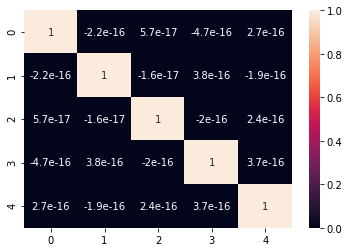

In [25]:
#multi collinearity check
corrmat = np.corrcoef(cntry_pca.transpose())
sns.heatmap(corrmat,annot = True)
plt.show()

In [26]:
colnames = list(Cntrydata1.columns)

In [35]:
# Principal Components matrix
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'PC3':pca_final.components_[2],
                       'PC4':pca_final.components_[3],'PC5':pca_final.components_[4]})
print(pcs_df)

      Feature       PC1       PC2       PC3       PC4       PC5
0  child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
1     exports  0.283897  0.613163  0.144761  0.003091  0.057616
2      health  0.150838 -0.243087 -0.596632  0.461897  0.518000
3     imports  0.161482  0.671821 -0.299927 -0.071907  0.255376
4      income  0.398441  0.022536  0.301548  0.392159 -0.247150
5   inflation -0.193173 -0.008404  0.642520  0.150442  0.714869
6  life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220
7   total_fer -0.403729  0.155233  0.019549  0.378304 -0.135262
8        gdpp  0.392645 -0.046022  0.122977  0.531995 -0.180167


## Creating PCA DataFrame for clustering

In [34]:
Cntry_PCA=pd.DataFrame(cntry_pca)
Cntry_PCA.columns=['PC1','PC2','PC3','PC4','PC5']
Country=Cntrydata['country']
Cntry_master=pd.concat([Country,Cntry_PCA],axis=1)
Cntry_master

,country,PC1,PC2,PC3,PC4,PC5
0,Luxembourg,6.917755,4.849844,1.001837,3.129643,-0.281031
1,Norway,3.721195,-1.447255,0.888029,2.764339,-0.772032
2,Switzerland,4.088544,-0.429462,-0.261547,2.307087,-0.193122
3,Qatar,4.242296,-0.195604,3.643875,2.389811,-2.842158
4,Denmark,3.010492,-0.865549,-0.335752,1.787223,0.102687
5,Sweden,2.818323,-0.914481,-0.101807,1.242279,-0.331557
6,Australia,2.342165,-1.988459,0.190344,1.105038,-0.731192
7,Netherlands,3.379157,0.115702,-0.738130,1.543035,0.370062
8,Ireland,3.668628,1.729493,-0.523989,0.989975,-0.123321
9,United States,2.641206,-2.997364,-1.721878,2.827110,0.818656


## Outlier Analysis

In [66]:
chk=Cntry_master.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [67]:
chk.astype(object)

,PC1,PC2,PC3,PC4,PC5
count,167,167,167,167,167
mean,-5.21206e-16,-1.56229e-17,-7.97765e-17,5.58436e-17,5.31843e-18
std,2.03975,1.24726,1.0851,1.00039,0.815229
min,-4.91207,-2.99736,-2.71408,-1.5952,-2.84216
25%,-1.38227,-0.752048,-0.521878,-0.783785,-0.386992
50%,0.0224073,-0.0944987,-0.245606,-0.311857,-0.0559924
75%,1.22433,0.553475,0.402545,0.710725,0.301909
90%,2.46232,1.29023,1.28331,1.21705,0.836301
95%,3.1038,1.71931,1.81378,1.79168,1.13837
99%,4.76626,4.79417,3.28581,2.78568,2.13443


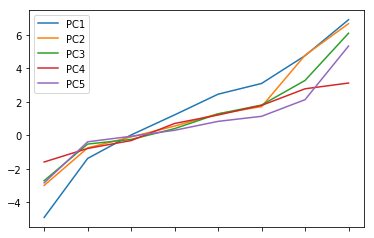

In [68]:
chk.drop(['count','mean','std'],inplace=True)
chk.plot.line()

#### the data shows graduality and hence outlier treatment is not required. There is some outlier in PC2 and PC5, but since we only have 167 entries, decided not to reject any data

# Clustering start

[[2, 0.30441994992318183], [3, 0.30797697865190166], [4, 0.32636833851745378], [5, 0.32665148905092095], [6, 0.25751187132762338], [7, 0.22864523333207437], [8, 0.2695361528679372], [9, 0.26134202990106337], [10, 0.2325066885145908], [11, 0.24948188502375068], [12, 0.22784390048217587], [13, 0.24131705860689365], [14, 0.23198647668546352]]


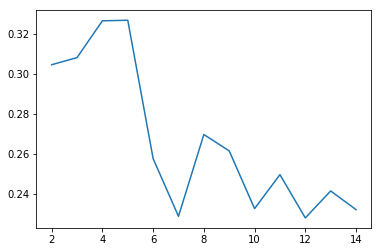

In [69]:
#Silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(Cntry_PCA)
    sse_.append([k, silhouette_score(Cntry_PCA, kmeans.labels_)])
                                     
print(sse_)
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.show()

#### k = 4 and 5 gives the best Silhouette score

#### Evaluation of Sum of Squared distance to find best K

[[1, 1420.8008933928593], [2, 968.46635255071465], [3, 749.61893902588884], [4, 619.32191028004945], [5, 539.25248391267746], [6, 469.7718911852121], [7, 420.67085733848307], [8, 395.00337245636263], [9, 355.94392173111146], [10, 331.31686932932814], [11, 299.74842291281681], [12, 282.1031760207776], [13, 267.65702524924188], [14, 251.1975383921872], [15, 233.72098634296833], [16, 220.7646964668491], [17, 217.49198443629953], [18, 202.64123748640205], [19, 192.13002433247104], [20, 185.36955116765509]]


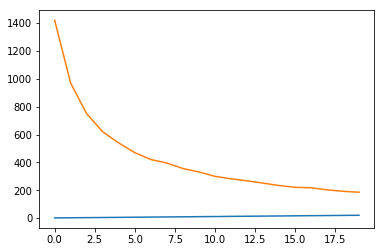

In [138]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(Cntry_PCA)
    ssd.append([num_clusters,model_clus.inertia_])
    
print(ssd)

plt.plot(ssd)

## K - means  

In [71]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(Cntry_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [129]:
Cntry_master_CLID=pd.concat([Cntrydata1, pd.Series(model_clus5.labels_)], axis=1)
country=Cntrydata['country']
Cntry_master_CLID=pd.concat([country,Cntry_master_CLID],axis=1)
colnames=list(Cntrydata.columns)
colnames.append('ClusterID')
Cntry_master_CLID.columns=colnames
Cntry_master_CLID.to_csv("Clustereddata.csv")
Cntry_master_CLID

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Luxembourg,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507,3
1,Norway,-0.872216,-0.051555,0.972873,-0.761910,2.349360,-0.173815,1.177951,-0.661206,4.095266,1
2,Switzerland,-0.839884,0.837584,1.710476,0.265559,1.995566,-0.708305,1.313292,-0.946105,3.372918,1
3,Qatar,-0.727966,0.775381,-1.827827,-0.956632,5.611542,-0.076082,1.008775,-0.581700,3.137608,1
4,Denmark,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511,1
5,Sweden,-0.877190,0.186281,1.027646,-0.256462,1.340008,-0.644352,1.234343,-0.641330,2.141643,1
6,Australia,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,1
7,Netherlands,-0.839884,1.130305,1.856536,0.692289,1.475282,-0.657921,1.144116,-0.767215,2.043141,1
8,Ireland,-0.847345,2.264597,0.866980,1.641040,1.485688,-1.043915,1.110281,-0.594951,1.955584,1
9,United States,-0.770246,-1.050464,4.047436,-1.288073,1.678193,-0.622623,0.918548,-0.674457,1.939167,1


In [128]:
Cntry_master_CLID.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID'],
      dtype='object')

# Analysis

In [130]:
Cntry_master_analysis = Cntry_master_CLID.pivot_table(values=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],index='ClusterID',aggfunc='mean')
Cntry_master_analysis

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,-0.415443,0.005862,-0.332310,-0.202702,0.041019,-0.217433,-0.025048,0.261069,-0.421105
1,-0.828609,0.172621,1.661902,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681
2,1.370732,-0.442735,-0.607873,-0.161688,-0.158686,-0.698416,0.198506,-1.305552,1.359293
3,-0.849003,4.935673,2.440797,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863
4,2.281385,-0.578452,-0.581936,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133


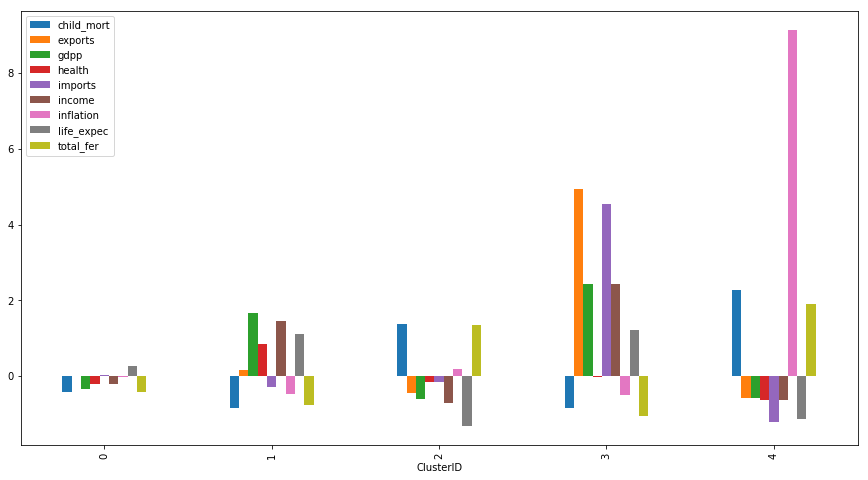

In [131]:
#plt.figure(figsize=(12,5))
Cntry_master_analysis.plot.bar(figsize=(15,8))
#sns.barplot(Cntry_master_analysis)

plt.show()

In [132]:
Cntry_master_analysis = Cntry_master_CLID.pivot_table(values='country',index='ClusterID',aggfunc='count')
Cntry_master_analysis

,country
ClusterID,
0,88
1,30
2,45
3,3
4,1


In [135]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(Cntry_PCA)
Cntry_master_CLID1=pd.concat([Cntrydata1, pd.Series(model_clus4.labels_)], axis=1)
country=Cntrydata['country']
Cntry_master_CLID1=pd.concat([country,Cntry_master_CLID1],axis=1)
colnames=list(Cntrydata.columns)
colnames.append('ClusterID')
Cntry_master_CLID1.columns=colnames
Cntry_master_CLID1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Luxembourg,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507,2
1,Norway,-0.872216,-0.051555,0.972873,-0.761910,2.349360,-0.173815,1.177951,-0.661206,4.095266,3
2,Switzerland,-0.839884,0.837584,1.710476,0.265559,1.995566,-0.708305,1.313292,-0.946105,3.372918,3
3,Qatar,-0.727966,0.775381,-1.827827,-0.956632,5.611542,-0.076082,1.008775,-0.581700,3.137608,3
4,Denmark,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511,3
5,Sweden,-0.877190,0.186281,1.027646,-0.256462,1.340008,-0.644352,1.234343,-0.641330,2.141643,3
6,Australia,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,3
7,Netherlands,-0.839884,1.130305,1.856536,0.692289,1.475282,-0.657921,1.144116,-0.767215,2.043141,3
8,Ireland,-0.847345,2.264597,0.866980,1.641040,1.485688,-1.043915,1.110281,-0.594951,1.955584,3
9,United States,-0.770246,-1.050464,4.047436,-1.288073,1.678193,-0.622623,0.918548,-0.674457,1.939167,3


In [136]:
Cntry_master_analysis1 = Cntry_master_CLID1.pivot_table(values='country',index='ClusterID',aggfunc='count')
Cntry_master_analysis1

,country
ClusterID,
0,48
1,87
2,3
3,29


In [121]:
pcs_df_chk

<bound method DataFrame.transpose of                  PC1       PC2       PC3       PC4       PC5
Feature                                                     
child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
exports     0.283897  0.613163  0.144761  0.003091  0.057616
health      0.150838 -0.243087 -0.596632  0.461897  0.518000
imports     0.161482  0.671821 -0.299927 -0.071907  0.255376
income      0.398441  0.022536  0.301548  0.392159 -0.247150
inflation  -0.193173 -0.008404  0.642520  0.150442  0.714869
life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220
total_fer  -0.403729  0.155233  0.019549  0.378304 -0.135262
gdpp        0.392645 -0.046022  0.122977  0.531995 -0.180167>

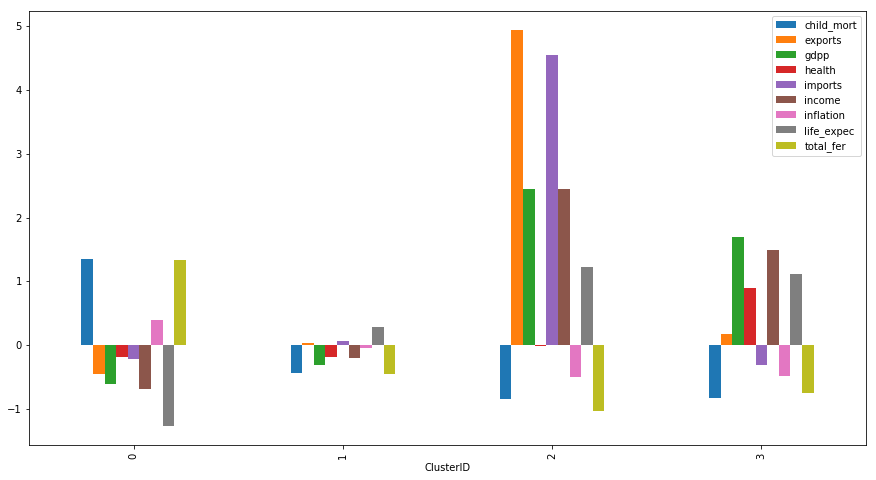

In [137]:
Cntry_master_analysis1 = Cntry_master_CLID1.pivot_table(values=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],index='ClusterID',aggfunc='mean')
Cntry_master_analysis1.plot.bar(figsize=(15,8))
plt.show()

In [139]:
Cntry_master_CLID1.to_csv("ClusteredData_fnl.csv")

# Hierarchical Clusters

In [141]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

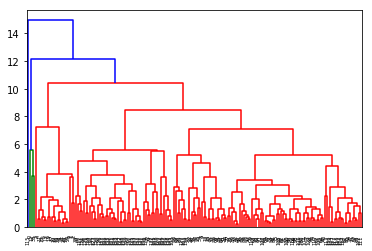

In [142]:
mergings = linkage(Cntry_PCA, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [179]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut.shape

(167,)

In [180]:
Cntry_master_CLID2=pd.concat([Cntrydata1, clusterCut], axis=1)
country=Cntrydata['country']
Cntry_master_CLID2=pd.concat([country,Cntry_master_CLID2],axis=1)
colnames=list(Cntrydata.columns)
colnames.append('ClusterID')
Cntry_master_CLID2.columns=colnames
Cntry_master_CLID2.to_csv("Hierarchihcal1.csv")

In [181]:
Cntry_master_analysis2 = Cntry_master_CLID2.pivot_table(values='country',index='ClusterID',aggfunc='count')
Cntry_master_analysis2

,country
ClusterID,
0,3
1,20
2,143
3,1


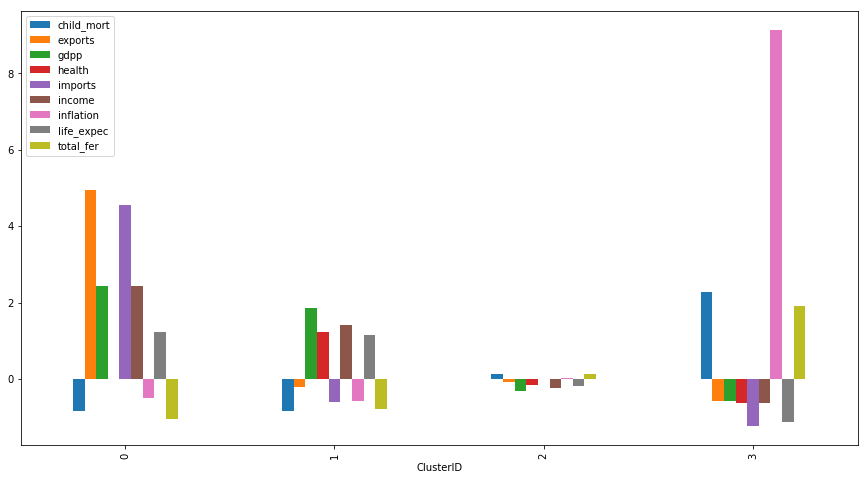

In [182]:
Cntry_master_analysis2 = Cntry_master_CLID2.pivot_table(values=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],index='ClusterID',aggfunc='mean')
Cntry_master_analysis2.plot.bar(figsize=(15,8))
plt.show()

In [1]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
clusterCut.shape

NameError: name 'pd' is not defined

In [184]:
Cntry_master_CLID2=pd.concat([Cntrydata1, clusterCut], axis=1)
country=Cntrydata['country']
Cntry_master_CLID2=pd.concat([country,Cntry_master_CLID2],axis=1)
colnames=list(Cntrydata.columns)
colnames.append('ClusterID')
Cntry_master_CLID2.columns=colnames
Cntry_master_CLID2.to_csv("Hierarchihcal2.csv")

In [185]:
Cntry_master_analysis2 = Cntry_master_CLID2.pivot_table(values='country',index='ClusterID',aggfunc='count')
Cntry_master_analysis2

,country
ClusterID,
0,3
1,20
2,94
3,49
4,1


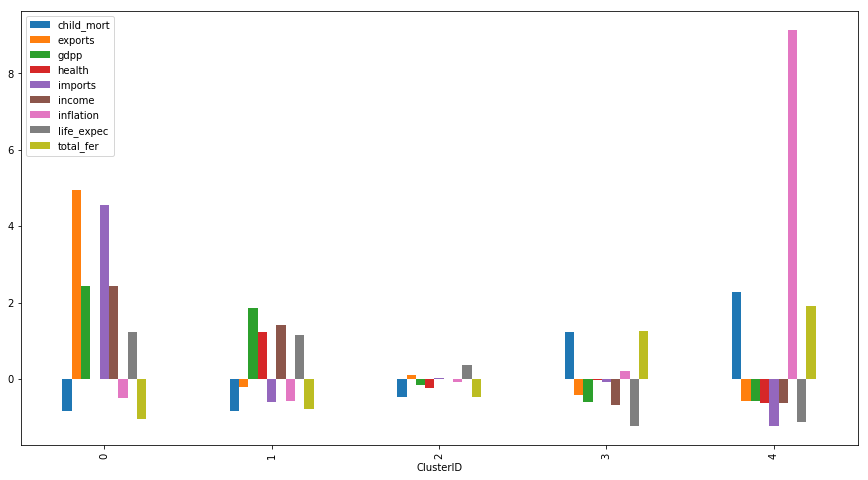

In [186]:
Cntry_master_analysis2 = Cntry_master_CLID2.pivot_table(values=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],index='ClusterID',aggfunc='mean')
Cntry_master_analysis2.plot.bar(figsize=(15,8))
plt.show()

# Final Model Selection

Principal Component Analysis
1. PC1 - 45% - child_mort/income/life_expectancy/total_fer/gdpp
2. PC2 - 18% - exports/imports
3. PC3 - 13% - health/inflation

In the above four models, only one model - KMeans with k=4, has participation of at least 5% of total population.
Hence we select that model for our presentation
